**IMPORTS**

In [2]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

%matplotlib inline
    

In [3]:
sample_sub_reg = pd.read_csv('c:/Users/Adrian/GA/labsprojects/project_2/datasets/sample_sub_reg.csv')
test = pd.read_csv('c:/Users/Adrian/GA/labsprojects/project_2/datasets/test.csv')
train = pd.read_csv('c:/Users/Adrian/GA/labsprojects/project_2/datasets/train.csv')


**CLEANING AND EDA**

In [4]:
# changing display settings so we can see all columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# removing spaces so the name of the columns match the dictionary
train.columns = train.columns.str.replace(' ','')
test.columns = test.columns.str.replace(' ','')

>**NULL VALUES**

In [10]:
# checking null values in train
train.isnull().sum()

Id                  0
PID                 0
MSSubClass          0
MSZoning            0
LotFrontage       330
LotArea             0
Street              0
Alley            1911
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemod/Add       0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         22
MasVnrArea         22
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           55
BsmtCond           55
BsmtExposure       58
BsmtFinType1       55
BsmtFinSF1          1
BsmtFinType2       56
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF  

In [11]:
# checking null values in train
test.isnull().sum()

Id                 0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage      160
LotArea            0
Street             0
Alley            821
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemod/Add      0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          25
BsmtCond          25
BsmtExposure      25
BsmtFinType1      25
BsmtFinSF1         0
BsmtFinType2      25
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea    

In [5]:
# assuming 0 or None for null values
null_replacements = {'LotFrontage': 0,
                     'Alley': 'NoAlley', 
                     'MasVnrType': 'NoMas',
                     'MasVnrArea': 'NoMas',
                     'Electrical': 'SBrkr', # assuming electrical of one row is the median
                     'BsmtQual': 'NoBsmt',
                     'BsmtCond': 'NoBsmt',
                     'BsmtExposure': 'NoBsmt',
                     'BsmtFinType1': 'NoBsmt',
                     'BsmtFinSF1': 0.0,
                     'BsmtFinType2': 'NoBsmt',
                     'BsmtFinSF2': 0.0,
                     'BsmtUnfSF': 0.0,
                     'TotalBsmtSF': 0.0,
                     'BsmtFullBath': 0,
                     'BsmtHalfBath': 0,
                     'FireplaceQu': 'NoFireplace',
                     'GarageYrBlt': 'NoGarage',
                     'GarageCars': 0.0,
                     'GarageArea': 0.0,
                     'GarageFinish': 'NoGarage',
                     'GarageType': 'NoGarage',
                     'GarageFinish': 'NoGarage',
                     'GarageQual': 'NoGarage', 
                     'GarageCond': 'NoGarage', 
                     'PoolQC': 'NoPool',
                     'Fence': 'NoFence',
                     'MiscFeature': 'None'}


In [6]:
# getting rid off null values
train = train.fillna(null_replacements)
test = test.fillna(null_replacements)

>**CONVERTING CATEGORICAL COLUMNS TO NUMERIC**

In [7]:
# nested dictionary listing each possible outcome for each column, and assigning a number to it
qual_replacements = {'Street': {'Pave': 1, 'Grvl': 0},
                    'Alley': {'Pave': 2, 'Grvl': 1, 'NoAlley': 0},
                    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
                    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt': 0},
                    'BsmtCond':  {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt': 0},
                    'BsmtFinType1': {'GLQ': 5, 'ALQ': 4, 'Rec': 4, 'BLQ': 3, 'LwQ': 2, 'Unf': 1, 'NoBsmt': 0},
                    'BsmtFinType2': {'GLQ': 5, 'ALQ': 4, 'Rec': 4, 'BLQ': 3, 'LwQ': 2, 'Unf': 1, 'NoBsmt': 0},
                    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                    'CentralAir': {'Y': 1, 'N': 0},
                    'KitechenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
                    'Functional': {'Typ': 8, 'Min1': 37, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
                    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoFireplace': 0},
                    'GarageType': {'2Types': 2, 'Attchd': 1, 'Basment': 1, 'BuiltIn': 1, 'CarPort': 1, 'Detchd': 1, 'NoGarage': 0},
                    'GarageFinish': {'Fin': 2, 'RFn': 1, 'Unf': 1, 'NoGarage': 0},
                    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0},
                    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}, 
                    'PavedDrive': {'Y': 1, 'P': 0, 'N': 0},
                    'PoolQC': {'Ex': 4, 'Gd': 3, 'Ta': 2, 'Fa': 1, 'NoPool': 0}}
                     

In [8]:
# converting both the train and test categorical columns
train = train.replace(qual_replacements)
test = test.replace(qual_replacements)

>**DUMMY COLUMNS FOR NEIGHBORHOOD**

In [9]:
# doing dummy columns for neighborhood columns and adding them to the original dataframes, train and test.
train = pd.concat([train, pd.get_dummies(train['Neighborhood'], drop_first = True)], axis = 1)
test = pd.concat([test, pd.get_dummies(test['Neighborhood'], drop_first = True)], axis = 1)

In [10]:
# test does not have properties in 2 columns, creating 2 new columns and filling them with 0
test['Landmrk'] = 0
test['GrnHill'] = 0

In [11]:
# checking number of columns stays the same between train and test (except for SalePrice)
train.shape

(2051, 108)

In [12]:
test.shape

(879, 107)

>**OUTLIERS**

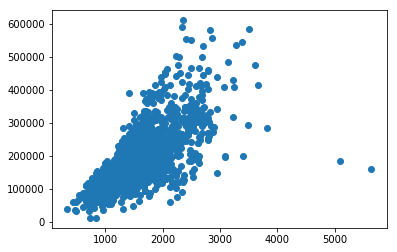

In [13]:
# outliers for GrLivArea
plt.scatter(x = train['GrLivArea'], y =train['SalePrice'])
plt.show()

In [14]:
# dropping 2 outliers
train = train[train['GrLivArea'] < 4_000]

**LOG TRANSFORMATIONS**

In [15]:
train['GrLivArea'] = np.log(train['GrLivArea'] + 1)
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF'] + 1)
train['1stFlrSF'] = np.log(train['1stFlrSF'] + 1)
train['LotFrontage'] = np.log(train['LotFrontage'] + 1)

In [16]:
# alternative method to do log transformations on features
    # for each columns, if skew is less than .90, then do the log in train
    #for c in train._get_numeric_data():
     #   if train[c].skew() > 0.90:
      #      train[c] = np.log(train[c] + 1)

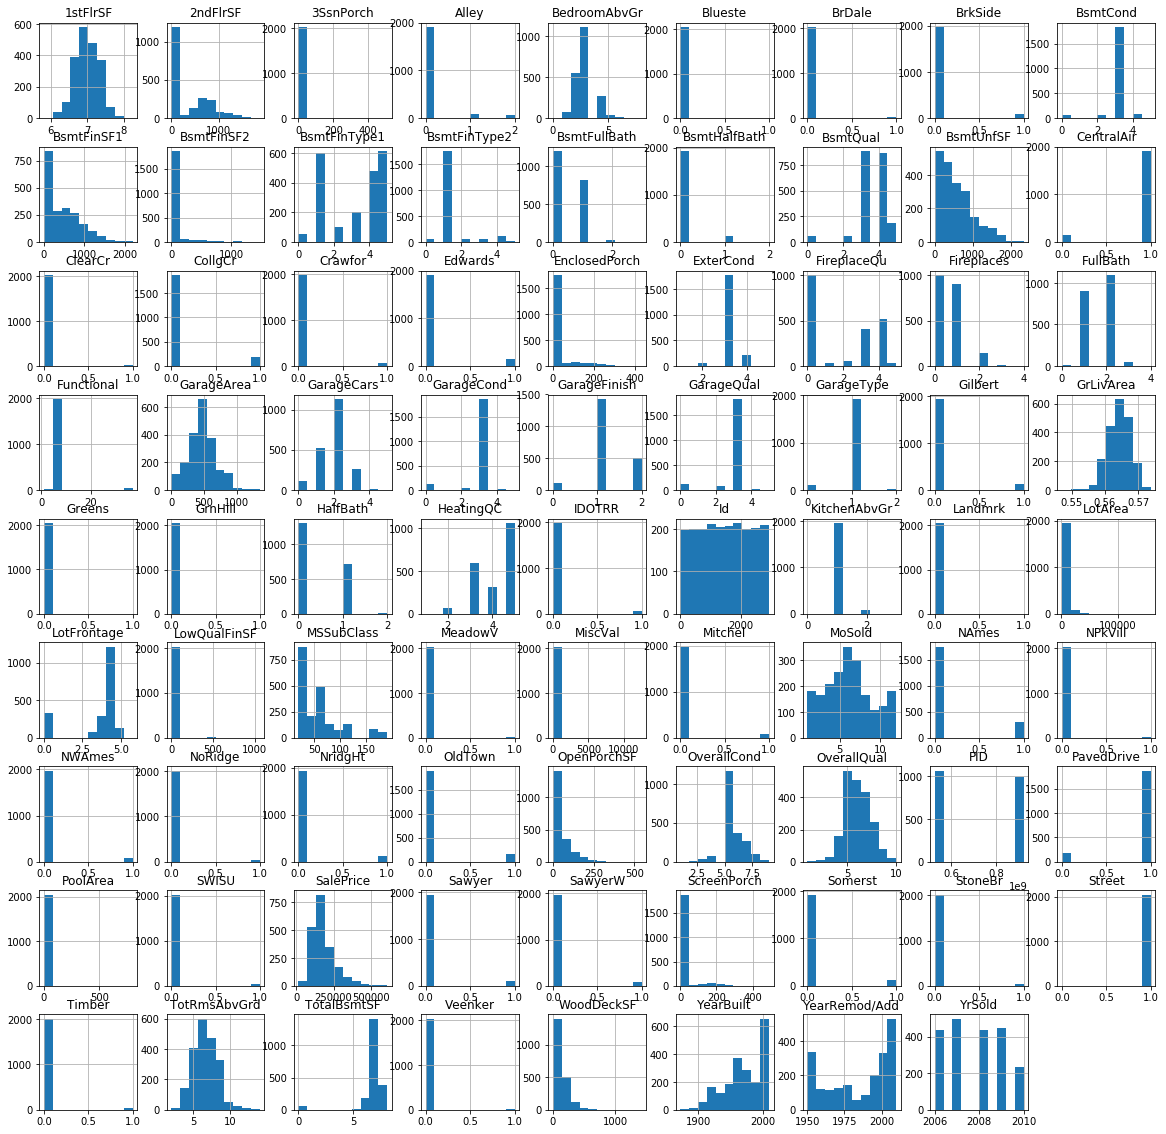

In [18]:
train.hist(figsize = (20, 20));

**DEFINING X AND Y FOR MODEL**

In [19]:
X = train[['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemod/Add',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']]
y = np.log(train.SalePrice)

**SCALING**

In [21]:
ss = StandardScaler()
ss.fit(X)
X_sc = ss.transform(X)
#X_test_sc = ss.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


**INSTANTIATE MODEL**

In [22]:
lr = linear_model.LinearRegression()

In [23]:
lasso = LassoCV(cv = 5)

In [24]:
ridge = RidgeCV()

**CROSS VAL**

In [25]:
cross_val_score(lr, X_sc, y, cv = 5).mean()

0.903548035704558

In [26]:
cross_val_score(lasso, X_sc, y, cv = 5).mean()

0.9042546216070928

In [27]:
cross_val_score(ridge, X_sc, y, cv = 5).mean()

0.9038958741240375

**FIT MODEL**

In [28]:
model = lasso.fit(X_sc, y)

In [29]:
model.score(X_sc, y)

0.9124196234800548

In [30]:
# new dataframe with Id and predicted prices
submissions = pd.DataFrame(test.Id)

In [31]:
# features for test data
features = test[['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemod/Add',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']]

In [32]:
# scaling test data
ss.fit(features)
features_sc = ss.transform(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
preds = model.predict(features_sc)

In [34]:
final_preds = np.exp(preds)

In [35]:
submissions['SalePrice'] = final_preds

In [36]:
submissions

,Id,SalePrice
0,2658,129832.480184
1,2718,164639.044257
2,2414,198411.474925
3,1989,103954.271559
4,625,168774.918118
5,333,95644.844087
6,1327,106998.810005
7,858,147230.978651
8,95,187581.128005
9,1568,167951.651479


In [37]:
submissions.to_csv('entry24.csv', index = False)